In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install keras==2.2.4
!pip install tensorflow==1.14.0
!pip install h5py==2.8.0

     |████████████████████████████████| 312 kB 5.2 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.2.4 which is incompatible.
     |████████████████████████████████| 109.3 MB 55 kB/s 
     |████████████████████████████████| 3.1 MB 34.5 MB/s 
     |████████████████████████████████| 488 kB 46.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator

In [5]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Model, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import layers

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [3]:
directory_root = '/content/drive/My Drive/Banana_Ripeness_Prediction/'

In [4]:
default_image_size = tuple((224, 224))
width=224
height=224
def image_array(dir):
    try:
        img = cv2.imread(dir)
        if img is not None :
            img = cv2.resize(img, default_image_size)   
            return img_to_array(img)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [9]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import cv2
from imutils import paths
import os

data = []
labels = []
count=0


In [14]:
DATA_PATH = "/content/drive/My Drive/Banana_Ripeness_Prediction/Data/Ripe Banana"
image_path_list = list(paths.list_images(DATA_PATH))

count =0
for image_path in image_path_list:
    # extract the class label from the filename
    print(image_path)
    label = image_path.split(os.path.sep)[-2]     
    data.append(image_array(image_path))
    labels.append(label)
   
    print(labels)
    print(data)

Streaming output truncated to the last 5000 lines.
        [149., 157., 164.],
        ...,
        [198., 207., 211.],
        [201., 207., 212.],
        [199., 205., 210.]]], dtype=float32), array([[[177., 190., 198.],
        [178., 191., 200.],
        [182., 194., 200.],
        ...,
        [176., 185., 189.],
        [175., 184., 188.],
        [172., 183., 187.]],

       [[178., 190., 198.],
        [183., 195., 201.],
        [182., 194., 200.],
        ...,
        [177., 186., 189.],
        [176., 185., 189.],
        [173., 184., 188.]],

       [[179., 190., 198.],
        [181., 193., 199.],
        [184., 194., 201.],
        ...,
        [176., 185., 189.],
        [176., 185., 188.],
        [174., 185., 189.]],

       ...,

       [[193., 194., 197.],
        [194., 196., 197.],
        [192., 195., 198.],
        ...,
        [164., 169., 167.],
        [167., 172., 170.],
        [165., 170., 168.]],

       [[188., 191., 195.],
        [191., 191., 196.],
     

In [16]:
DATA_PATH = "/content/drive/My Drive/Banana_Ripeness_Prediction/Data/UnRipe Banana"
image_path_list = list(paths.list_images(DATA_PATH))

count =0
for image_path in image_path_list:
    # extract the class label from the filename
    label = image_path.split(os.path.sep)[-2]

    data.append(image_array(image_path))
    labels.append(label)
  
    print(label)
    print(data)

Streaming output truncated to the last 5000 lines.

       [[197., 206., 215.],
        [201., 209., 217.],
        [200., 209., 219.],
        ...,
        [156., 163., 170.],
        [159., 167., 174.],
        [160., 168., 175.]]], dtype=float32), array([[[207., 220., 228.],
        [208., 221., 229.],
        [206., 219., 227.],
        ...,
        [204., 216., 222.],
        [204., 216., 222.],
        [207., 219., 225.]],

       [[207., 220., 228.],
        [209., 222., 230.],
        [207., 220., 228.],
        ...,
        [205., 219., 225.],
        [212., 223., 227.],
        [207., 219., 225.]],

       [[208., 221., 229.],
        [207., 220., 228.],
        [204., 217., 225.],
        ...,
        [208., 220., 226.],
        [206., 219., 224.],
        [206., 219., 224.]],

       ...,

       [[204., 215., 223.],
        [206., 217., 225.],
        [209., 220., 227.],
        ...,
        [169., 176., 179.],
        [165., 174., 178.],
        [168., 176., 181.]],

    

In [17]:
class_labels = LabelBinarizer()
image_labels = class_labels.fit_transform(labels)
pickle.dump(class_labels,open('/content/drive/My Drive/Banana_Ripeness_Prediction/label_transform.pkl', 'wb'))
n_classes = len(class_labels.classes_)
print(class_labels.classes_)

['Ripe Banana' 'UnRipe Banana']


In [18]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [19]:
print(class_labels.classes_)

['Ripe Banana' 'UnRipe Banana']


In [20]:
np_image_list = np.array(data, dtype=np.float16) / 225.0

In [21]:
x_train, x_test, y_train, y_test = train_test_split(np_image_list, labels, test_size=0.2, random_state = 42) 

In [22]:
datagen = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

SIZE=224
N_ch=3


In [23]:
from keras.applications import vgg16, resnet50
def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='softmax'))
    
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )
    
    return model

In [24]:
vgg_model = vgg16.VGG16(weights="imagenet", 
                        include_top=False, 
                        input_shape=(224,224,3))

base_model = vgg16.VGG16
trainable_layers = 4

base_model = base_model(weights="imagenet", include_top=False, input_shape=(224,224,3))

for layer in base_model.layers[:-trainable_layers]:
        layer.trainable = False


model = build_model(base_model ,lr = 1e-4)
model.summary()





58892288/58889256 [==============================] - 0s 0us/step


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026

In [25]:
from keras.optimizers import SGD
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [26]:
EPOCHS =5
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((224, 224))
image_size = 0

history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )
model.save('/content/drive/My Drive/Banana_Ripeness_Prediction/model_vgg16.h5')

Epoch 1/5
3/3 [==============================] - 79s 26s/step - loss: 0.8880 - acc: 0.5208 - val_loss: 0.7727 - val_acc: 0.4516
Epoch 2/5
3/3 [==============================] - 72s 24s/step - loss: 0.7747 - acc: 0.6658 - val_loss: 0.6381 - val_acc: 0.6452
Epoch 3/5
3/3 [==============================] - 72s 24s/step - loss: 0.6151 - acc: 0.6624 - val_loss: 0.5185 - val_acc: 0.9032
Epoch 4/5
3/3 [==============================] - 73s 24s/step - loss: 0.5543 - acc: 0.6891 - val_loss: 0.3987 - val_acc: 0.9032
Epoch 5/5
3/3 [==============================] - 75s 25s/step - loss: 0.5445 - acc: 0.7500 - val_loss: 0.3128 - val_acc: 0.9677


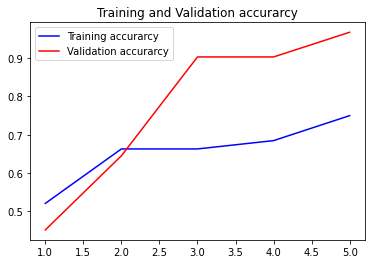

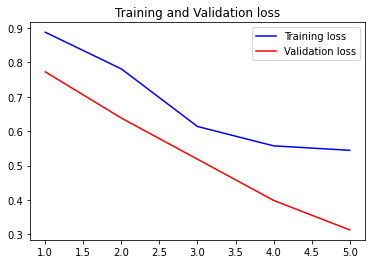

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [28]:
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
31/31 [==============================] - 28s 890ms/step
Test Accuracy: 96.77419066429138


In [29]:
#Resnet 50
from keras.applications import vgg16, resnet50
def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='softmax'))
    
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )
    
    return model

In [30]:

resnet_model = resnet50.ResNet50(weights="imagenet", 
                        include_top=False
                        )

base_model = resnet50.ResNet50
trainable_layers = 4

base_model = base_model(weights="imagenet", include_top=False)

for layer in base_model.layers[:-trainable_layers]:
        layer.trainable = False


model = build_model(base_model ,lr = 1e-4)
model.summary()

/usr/local/lib/python3.7/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4098      
Total params: 23,600,002
Trainable params: 1,062,914
Non-trainable params: 22,537,088
_________________________________________________________________


In [31]:
from keras.optimizers import SGD
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [32]:
EPOCHS =5
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((224, 224))
image_size = 0

history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )
model.save('/content/drive/My Drive/Banana_Ripeness_Prediction/model_resnet50.h5')

Epoch 1/5
3/3 [==============================] - 41s 14s/step - loss: 0.9064 - acc: 0.5729 - val_loss: 0.7354 - val_acc: 0.3871
Epoch 2/5
3/3 [==============================] - 35s 12s/step - loss: 0.9358 - acc: 0.5188 - val_loss: 0.7329 - val_acc: 0.3871
Epoch 3/5
3/3 [==============================] - 33s 11s/step - loss: 0.6822 - acc: 0.6541 - val_loss: 0.7584 - val_acc: 0.3871
Epoch 4/5
3/3 [==============================] - 33s 11s/step - loss: 0.8918 - acc: 0.5909 - val_loss: 0.7835 - val_acc: 0.3871
Epoch 5/5
3/3 [==============================] - 34s 11s/step - loss: 0.6791 - acc: 0.6875 - val_loss: 0.7911 - val_acc: 0.3871


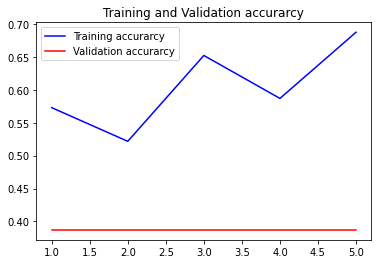

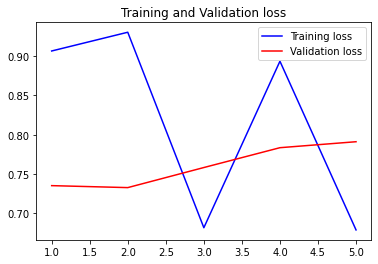

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()